# Pandas
<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/material/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From http://pandas.pydata.org/pandas-docs/stable/

pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

See also:

* https://github.com/restrepo/data-analysis
  * https://classroom.github.com/g/sSMBdBqN
  * https://classroom.github.com/a/PcbQBE7F
* https://github.com/restrepo/PythonTipsAndTricks
* https://pbpython.com/excel-pandas-comp.html [[archive.org](https://web.archive.org/web/20201126143453/https://pbpython.com/excel-pandas-comp.html)]

A good and practice book about `Pandas` possibilities is:

[__Python for Data Analysis__](https://drive.google.com/open?id=0BxoOXsn2EUNIWExXbVc4SDN0YTQ)<br/>
Data Wrangling with Pandas, NumPy, and IPython<br/>
_By William McKinney_


This other is about aplications based on `Pandas`:
![image.png](https://covers.oreillystatic.com/images/0636920030515/cat.gif) [Introduction to Machine Learning with Python](https://drive.google.com/open?id=0BxoOXsn2EUNISGhrdEZ3S29fS3M)<br/>
A Guide for Data Scientists
By Sarah Guido, Andreas Müller

`Pandas` can be used in a similar way to `R`, which is based on similar data structures. `Pandas` also can replace the use of graphical interfaces to access spreadsheets like Excel

## Standard way to load the module

In [1]:
import pandas as pd
pd.__version__

'1.1.5'

## Basic structure: DataFrame

An flat _spreadsheet_ can be seen in terms of the types of variables of `Python` just as dictionary of lists, where each column of the spreadsheet is a pair key-list of the dictionary 

|   |  A   |  B   |
|---|:----:|:----:|
| 1 | even | odd  |
| 2 |   0  | 1    |
| 3 |   2  | 3    |
| 4 |   4  | 5    |
| 5 |   6  | 7    |
| 6 |   8  | 9    |

In [2]:
numbers={"even": [0,2,4,6,8],   #  First  key-list
         "odd" : [1,3,5,7,9] }  #  Second key-list

## Data structures

`Pandas` has two new data structures:
1. `DataFrame` which are similar to numpy arrays but with some assigned key. For example, for the previous case
```python
import numpy as np
np.array([[0,1],
          [2,3],
          [4,5],
          [6,7],
          [8,9] 
         ])
```
1. `Series` which are enriched  to dictionaries, as the ones defined for the rows of the previous example: `{'even':0,'odd':1}`.




The rows in a two-dimensional `DataFrame` corresponds to `Series` with similar keys, while the columns are also Series with the indices as keys. 

An example of a  `DataFrame` is a spreadsheet, as the one before.

### `DataFrame`
`Pandas` can convert a dictionary of lists, like the `numbers` dictionary before, into a `DataFrame`, which is just an spreadsheet but interpreted at the programming level:



In [3]:
numbers

{'even': [0, 2, 4, 6, 8], 'odd': [1, 3, 5, 7, 9]}

In [4]:
import pandas as pd
df=pd.DataFrame(numbers)
df

,even,odd
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


It is equivalent to:

In [5]:
df.to_dict()

{'even': {0: 0, 1: 2, 2: 4, 3: 6, 4: 8}, 'odd': {0: 1, 1: 3, 2: 5, 3: 7, 4: 9}}

In [6]:
pd.DataFrame(  {'even': {0: 0, 1: 2, 2: 4, 3: 6, 4: 8}, 'odd': {0: 1, 1: 3, 2: 5, 3: 7, 4: 9}} )


,even,odd
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [7]:
pd.DataFrame.from_dict(numbers)

,even,odd
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


See below for other possibilities of [creating Pandas DataFrames from lists and dictionaries](https://fisica.udea.edu.co:4443/user/restrepo/notebooks/prog/cursos/data-analysis/Pandas.ipynb#Intialization-from-lists-and-dictionaries)

The main advantage of the `DataFrame`, `df`, is that it can be managed without a graphical interface.

We can check the shape of the `DataFrame`

In [8]:
df.shape

(5, 2)

####  Export DataFrame to other formats
* To export to excel:

In [9]:
df.to_excel('example.xlsx',index=False)

In [10]:
newdf=pd.read_excel('example.xlsx')
newdf

,even,odd
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


__Activity__: Open the resulting spreadsheet in Google Drive, publish it and open from the resulting link with Pandas in the next cell

In [11]:
df=pd.read_excel('https://bit.ly/3dS3ErO')
df

,even,odd
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


### `Series`

Each column of the DataFrame is now an augmented dictionary called `Series`, with the indices as the keys of the `Series`

A `Pandas` `Series` object can be just initialized from a `Python` dictionary:

In [12]:
type( df['even'] )

pandas.core.series.Series

The keys are the index of the `DataFrame`

In [13]:
#df['even']
df.even[4]

8

Each row is also a series

In [14]:
df.loc[0]

even    0
odd     1
Name: 0, dtype: int64

with keys: `'even'` and `'odd'`

In [15]:
df.loc[0]['even']

0

or attributes `even` and `odd`

In [16]:
df.loc[0].odd

1

One specific cell value can be reached with the index and the key:

In [17]:
df.loc[2,'odd']

5

In [18]:
s=pd.Series({'Name':'Juan Valdez','Nacionality':'Colombia','Age':23})
s

Name           Juan Valdez
Nacionality       Colombia
Age                     23
dtype: object

*Note* that the key name can be used also as an attribute.


In [19]:
df.odd

0    1
1    3
2    5
3    7
4    9
Name: odd, dtype: int64

> The __power__ of Pandas rely in that their main data structures: `DataFrames` and `Series`, are enriched with many useful methods and attributes.

### [Official definition of Pandas](http://pandas.pydata.org/pandas-docs/stable/)

> Pandas is a Python package providing __fast__, __flexible__, and __expressive__ _data structures_ designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it _has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool_ available in any language. It is already well on its way toward this goal.

* "relational": the list of data is identified with some unique index (like a `SQL` table)
* "labeled": the list is identified with a key, like the previous `odd` or `even` keys.


For example. A double bracket `[[...]]`, can be used to filter data.

A row in a two-dimensional `DataFrame` corresponds to `Series` with the same keys of the `DataFrame`, but with single values instead of a list 

In [20]:
df.loc[[0]]

,even,odd
0,0,1


In [21]:
print( 'the row has' )
print( '                  keys: {} and values: {}'.format( list( df.loc[[0]].keys() ),df.loc[[0]].values[0]  ) )
print( "like the dictionay:" )
print( "                      { 'even' : 0, 'odd' : 1 }")

the row has
                  keys: ['even', 'odd'] and values: [0 1]
like the dictionay:
                      { 'even' : 0, 'odd' : 1 }


To filter a column:

In [22]:
df[['odd']]

,odd
0,1
1,3
2,5
3,7
4,9


### More on `Series`

A `Pandas` `Series` object can be just initialized from a `Python` dictionary:

In [23]:
s=pd.Series({'Name':'Juan Valdez','Nacionality':'Colombia','Age':23})
s

Name           Juan Valdez
Nacionality       Colombia
Age                     23
dtype: object

In [24]:
s['Name']

'Juan Valdez'

but also as containers of name spaces!

In [25]:
s.Name

'Juan Valdez'

## `DataFrame` initialization

### Initization from an existing spreadsheet. 
This can be locally in your computer o from some downloadable  link

In [26]:
df=pd.read_excel('http://bit.ly/spreadsheet_xlsx')
df

,Nombre,Edad,Compañia
0,Juan Valdez,23,Café de Colombia
1,Álvaro Uribe Vélez,65,Senado de la República


To make a downloadable link for any spread sheet in Google Drive, follow the sequence:
```
File → Publish to the web...→ Entire Document → Web page → Microsoft excel (xlsx)
```
as illustrated in the figure:
![GS](https://github.com/restrepo/data-analysis/blob/master/img/img1.png?raw=1)

In [27]:
df.loc[0,'Edad']=32
#df.at[0,'Edad']=32
df

,Nombre,Edad,Compañia
0,Juan Valdez,32,Café de Colombia
1,Álvaro Uribe Vélez,65,Senado de la República


*After* some modification

it can be saved again as an `excel file` with the option to not create a column of indices: `index=False`

### Intialization from lists and dictionaries

#### Inizialization from Series
We start with an empty `DataFrame`:

Creating Pandas DataFrame from list and dictionaries [offers many alternatives](http://pbpython.com/pandas-list-dict.html)

![creating dataframes](http://pbpython.com/images/pandas-dataframe-shadow.png)

#### Row oriented way
* In addition to the dictionary of lists [already illustrated at the beginning]() that in this case corresponds to:

In [28]:
pd.DataFrame({'Nombre'   : ['Juan Valdez','Álvaro Uribe Vélez'],
              'Edad'     : [32,            65                 ],
              'Compañia' : ['Café de Colombia','Senado de la República']})

,Nombre,Edad,Compañia
0,Juan Valdez,32,Café de Colombia
1,Álvaro Uribe Vélez,65,Senado de la República


* We can obtain the DataFrame from list of items

# Note:

**Deprecated since version 0.23.0**: *from_items* is deprecated and will be removed in a future version. Use ***DataFrame.from_dict(dict(items))*** instead. ***DataFrame.from_dict(OrderedDict(items))*** may be used to preserve the key order.

In [29]:
pd.DataFrame.from_dict(dict([ [ 'Nombre'  , ['Juan Valdez','Álvaro Uribe Vélez']],
                          [ 'Edad'    , [  32,            65               ]],
                          [ 'Compañia', ['Café de Colombia','Senado de la República']] ]) )

,Nombre,Edad,Compañia
0,Juan Valdez,32,Café de Colombia
1,Álvaro Uribe Vélez,65,Senado de la República


* We can obtain the `DataFrame` from dictionary

In [30]:
pd.DataFrame( [{'Nombre':'Juan Valdez',        'Edad': 32   ,'Compañia':'Café de Colombia'      },
              {'Nombre':'Álvaro Uribe Vélez', 'Edad': 65   ,'Compañia':'Senado de la República'}]
            )

,Nombre,Edad,Compañia
0,Juan Valdez,32,Café de Colombia
1,Álvaro Uribe Vélez,65,Senado de la República


In [31]:
df=pd.DataFrame()
df

""


### Initialization from sequential rows as  Series
We start with an empty `DataFrame`:

In [32]:
df=pd.DataFrame()
df.empty

True

We can append a dictionary (or Series) as a row of the `DataFrame`, provided that we always use the option: `ignore_index=True`

In [33]:
d={'Name':'Juan Valdez','Nacionality':'Colombia','Age':23}
df=df.append(d,ignore_index=True)
df

,Age,Nacionality,Name
0,23.0,Colombia,Juan Valdez


We can fix the type of data of the `'Age'` column

In [34]:
type(df.Age[0])

numpy.float64

In [35]:
df['Age']=df.Age.astype(int)
df

,Age,Nacionality,Name
0,23,Colombia,Juan Valdez


To add a second file we build another `dict`

In [36]:
d={}
for k in ['Name','Nacionality','Age','Company']:
    var=input('{}:\n'.format(k))
    d[k]=var

Name:
Pablo
Nacionality:
Colombia
Age:
26
Company:
UdeA


#### Exercises
* Display the resulting `Series` in the screen:

In [37]:
pd.Series(d)

Name              Pablo
Nacionality    Colombia
Age                  26
Company            UdeA
dtype: object

* Append to the previous `DataFrame` and visualize it:

In [38]:
df=df.append(d,ignore_index=True)
df

,Age,Nacionality,Name,Company
0,23,Colombia,Juan Valdez,NaN
1,26,Colombia,Pablo,UdeA


* Fill NaN with empty strings

In [39]:
df=df.fillna('')

* Save `Pandas` `DataFrame` as an Excel file

In [40]:
df.to_excel('prof.xlsx',index=False)

* Load pandas DataFrame from the saved file in Excel

In [41]:
pd.read_excel('prof.xlsx')

,Age,Nacionality,Name,Company
0,23,Colombia,Juan Valdez,NaN
1,26,Colombia,Pablo,UdeA


### Common operations upon `DataFrames`
See https://github.com/restrepo/PythonTipsAndTricks

* __To fill a specific cell__

In [42]:
df.at[0,'Company']='Federación de Caferos'

In [43]:
df

,Age,Nacionality,Name,Company
0,23,Colombia,Juan Valdez,Federación de Caferos
1,26,Colombia,Pablo,UdeA


## Other formats to saving and read files
We are interested in format which keeps the tags of the columns, like `'Nombre', 'Edad', 'Compañia'`

In [44]:
df=pd.read_excel('http://bit.ly/spreadsheet_xlsx')
df

,Nombre,Edad,Compañia
0,Juan Valdez,23,Café de Colombia
1,Álvaro Uribe Vélez,65,Senado de la República


In [45]:
type(df.loc[0,'Edad'])

numpy.int64

#### CSV

In [46]:
df.to_csv('hoja.csv',index=False)

We can check the explicit file format with

In [47]:
df.to_csv(None,index=False)

'Nombre,Edad,Compañia\nJuan Valdez,23,Café de Colombia\nÁlvaro Uribe Vélez,65,Senado de la República\n'

In [48]:
print(df.to_csv(None,index=False))

Nombre,Edad,Compañia
Juan Valdez,23,Café de Colombia
Álvaro Uribe Vélez,65,Senado de la República



In [49]:
pd.read_csv('hoja.csv')

,Nombre,Edad,Compañia
0,Juan Valdez,23,Café de Colombia
1,Álvaro Uribe Vélez,65,Senado de la República


#### JSON

This format keeps the Python lists and dictionaries at the storage level

In [50]:
df=pd.DataFrame([{"Name":"Donald Trump","Age":74},
                 {"Name":"Barak Obama", "Age":59}])
df

,Name,Age
0,Donald Trump,74
1,Barak Obama,59


This format allow us to keep exactly the very same list of dictionaries structure!

In [51]:
print(df.to_json(None,orient='records'))

[{"Name":"Donald Trump","Age":74},{"Name":"Barak Obama","Age":59}]


__Activity__: 
* Save to a file instead of `None` and open the file with some editor. 

In [52]:
df.to_json('presidents.json',orient='records')

* Add a break-line at the end of the first dictionary and try to
load the resulting file with `pd.read_json`

In [53]:
pd.read_json('presidents.json')

,Name,Age
0,Donald Trump,74
1,Barak Obama,59


JSON allows for some flexibility in the break-lines structure:

In [54]:
hm='''
hola
mundo
'''

In [55]:
hm

'\nhola\nmundo\n'

In [56]:
pd.read_json('''
             [{"Name":"Donald Trump","Age":73},
              {"Name":"Barak Obama", "Age":58}]
            ''')

,Name,Age
0,Donald Trump,73
1,Barak Obama,58


For large databases it is convinient just to accumulate dictionaries in a sequential form:

In [57]:
print(df.to_json(None,orient='records',lines=True))

{"Name":"Donald Trump","Age":74}
{"Name":"Barak Obama","Age":59}


In [58]:
pd.read_json('''
             {"Name":"Donald Trump","Age":73}
             {"Name":"Barak Obama", "Age":58}
            ''',orient='records',lines=True)

,Name,Age
0,Donald Trump,73
1,Barak Obama,58


__Activity__: 
* Save to a file instead of `None`, with options: `orient='records',lines=True`, and open the file with some editor. 

In [59]:
df.to_json('presidents.json',orient='records',lines=True)

* Add a similar dictionary in the next new line, and try to
load the resulting file with `pd.read_json` with options: `orient='records',lines=True`. 
   * WARNING: Use doble-quotes `"` to write the keys od the new
dictionary

In [67]:
pd.read_json('presidents.json', orient='records',lines=True)

,Name,Age
0,Donald Trump,74
1,Barak Obama,59
2,Joe Biden,78


Any Python string need to be converted first to double-quotes before to be used as JSON string.

__Example__

In [61]:
numbers={"even": [0,2,4,-6,8],   #  First  key-list
         "odd" : [1,3,-5,7,9] }  #  Second key-list

In [62]:
numbers

{'even': [0, 2, 4, -6, 8], 'odd': [1, 3, -5, 7, 9]}

In [63]:
str(numbers)

"{'even': [0, 2, 4, -6, 8], 'odd': [1, 3, -5, 7, 9]}"

This string can be writing in the `JSON` format by replacing the single quotes, ' , by  duoble quotes, ":

In [64]:
str(numbers).replace("'",'"')

'{"even": [0, 2, 4, -6, 8], "odd": [1, 3, -5, 7, 9]}'

and now can be used as an JSON input

In [65]:
df=pd.read_json(  str(numbers).replace("'",'"') )
df

,even,odd
0,0,1
1,2,3
2,4,-5
3,-6,7
4,8,9


__Activity__: Try to read the string as JSON without make the double-quote replacement

In [66]:
import json
pd.read_json(json.dumps(numbers))

,even,odd
0,0,1
1,2,3
2,4,-5
3,-6,7
4,8,9


## Filters
The main application of labeled data for data analysis is the possibility to make filers, or cuts, to obtain specific reduced datasets to further analysis

In [68]:
df

,even,odd
0,0,1
1,2,3
2,4,-5
3,-6,7
4,8,9


In [69]:
df[df.even.abs()>4]

,even,odd
3,-6,7
4,8,9


In [70]:
#and
df[(df.even>0) & (df.odd<0)]

,even,odd
2,4,-5


In [71]:
df[~((df.even>0) & (df.odd<0)) ]

,even,odd
0,0,1
1,2,3
3,-6,7
4,8,9


In [72]:
#or
df[(df.even<0) | (df.odd<0)]

,even,odd
2,4,-5
3,-6,7


## The `apply` method
The advantage of the spreadsheet paradigm is that the columns can be transformed with functions. All the typical functions avalaible for a spreadsheet are already implemented like the method `.abs()` used before, or the method: `.sum()`

In [73]:
df.even.sum()

8

__Activity__: Explore the avalaible methods by using the completion system of the notebook after the last semicolon of `df.even.`

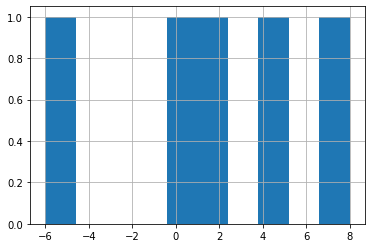

In [74]:
df.even.hist()

In addittion, for the `DataFrame` paradigm, we can easy implement any other function directly at the programming level either along the columns or along the rows

### Column-level `apply`
We just select the column and apply the direct or implicit function:
* Pre-defined function

In [75]:
df.even.apply(abs)

0    0
1    2
2    4
3    6
4    8
Name: even, dtype: int64

* Implicit function

In [76]:
df.even.apply(lambda n:isinstance(n,int))

0    True
1    True
2    True
3    True
4    True
Name: even, dtype: bool

In [77]:
df.even.apply(lambda n: n**2)

0     0
1     4
2    16
3    36
4    64
Name: even, dtype: int64

### Row-level apply
The foll row is passed as dictionary to the explicit or implicit function when `apply` is used for the full `DataFrame` and the option `axis=1` is used at the end

In [78]:
df['even']+df['odd']

0     1
1     5
2    -1
3     1
4    17
dtype: int64

In [79]:
df.apply(lambda row: row['even']+row['odd']**2,axis='columns')

0     1
1    11
2    29
3    43
4    89
dtype: int64

## Chain tools for data analysis
There are several chain tools for data analyis like the
* Spreadsheet based one, like Excel 
* Relational databases with the use of more advanced SQL tabular data with some data base software like MySQL
* Non-relational databases with Pandas, R, or MongoDB

Here we illustrate an example of use fo a non-relational database with Pandas

## Relational databases

In [80]:
df=pd.read_excel('http://bit.ly/spreadsheet_xlsx')
persona=df[['Nombre','Edad']]

In [81]:
persona['id']=[888,666]
persona

,Nombre,Edad,id
0,Juan Valdez,23,888
1,Álvaro Uribe Vélez,65,666


In [82]:
d1={'id':888, 'Inicio':2010,'Fin:':None,'Cargo':'Arriero','Compañía':'Café de Colombia'}
d2={'id':666, 'Inicio':2013,'Fin:':2020,'Cargo':'Senador','Compañía':'Senado de la República de Colombia'}
d3={'id':666, 'Inicio':2020,'Fin:':None,'Cargo':'Influencer','Compañía':'Twitter'}
trabajo=pd.DataFrame( [d1,d2,d3] )  
trabajo

,id,Inicio,Fin:,Cargo,Compañía
0,888,2010,NaN,Arriero,Café de Colombia
1,666,2013,2020.0,Senador,Senado de la República de Colombia
2,666,2020,NaN,Influencer,Twitter


![img](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/material/figures/relation.jpg)

### Actividad
Obtenga el último trabajo de Álvaro Uribe Vélez

In [83]:
cc=persona[persona['Nombre'].str.lower().str.contains('álvaro uribe vélez')].iloc[0].get('id')
trabajo[trabajo['id']==cc]['Cargo'].iloc[-1]

'Influencer'

## Non-relational databases

In [84]:
persona=persona.drop('id',axis='columns')

In [85]:
persona['Trabajo']=''
#Column need to be converted to object to assign an advance object like a list
persona['Trabajo']=persona['Trabajo'].astype('object')
persona.at[0,'Trabajo']=[d1]
persona.at[1,'Trabajo']=[d2,d3]


In [86]:
persona

,Nombre,Edad,Trabajo
0,Juan Valdez,23,"[{'id': 888, 'Inicio': 2010, 'Fin:': None, 'Ca..."
1,Álvaro Uribe Vélez,65,"[{'id': 666, 'Inicio': 2013, 'Fin:': 2020, 'Ca..."


In [87]:
pd.DataFrame( persona.loc[1,'Trabajo'] )

,id,Inicio,Fin:,Cargo,Compañía
0,666,2013,2020.0,Senador,Senado de la República de Colombia
1,666,2020,NaN,Influencer,Twitter


### Actividad
Obtenga el último trabajo de Álvaro Uribe Vélez

In [88]:
persona[persona['Nombre']=='Álvaro Uribe Vélez'
       ].Trabajo.apply(
        lambda l: [d.get('Cargo') for d in l ]).str[-1]

1    Influencer
Name: Trabajo, dtype: object

We have shown that the simple two dimensional spreadsheets where each cell values is a simple type like string, integer, or float, can be represented as a dictionary of lists values or a list of dictionary column-value assignment. 

We can go further and allow to store in the value itself a more general data structure, like nested lists and dictionaries. This allows advanced data-analysis when the `apply` methos is used to operate inside the nested lists or dictionaries.

See for example:


##  World wide web
There are really three kinds of web
* The normal web, 
* The deep web,
* _The machine web_. The web for machine readable responses. It is served in `JSON` or `XML`  formats, which preserve programming objects.

### Normal web

In [89]:
pd.read_html('https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory')[0][1:]

,COVID-19 pandemic,COVID-19 pandemic.1
1,Disease,COVID-19
2,Virus strain,SARS-CoV-2
3,Source,"Probably bats, possibly via pangolins[1][2]"
4,Location,Worldwide
5,First outbreak,Mainland China[3]
6,Index case,"Wuhan, Hubei, China.mw-parser-output .geo-defa..."
7,Date,"1 December 2019[3] – present(1 year, 4 months,..."
8,Confirmed cases,"134,519,292[4]"
9,Active cases,"55,185,531[4]"
10,Recovered,"76,419,476[4]"


Real world example: microsoft academics
![img](https://docs.microsoft.com/en-us/academic-services/graph/media/erd/entity-relationship-diagram.png)

### Machine web
For example, consider the following normal web page:

http://old.inspirehep.net/search?p=doi:10.1103/PhysRevLett.122.132001

about a Scientific paper with people from the University of Antioquia. A _machine web_ version can be easily obtained in JSON just by attaching the extra parameter `&of=recjson`, and direcly loaded from Pandas, which works like a _browser for the third web_:

In [90]:
import pandas as pd

In [91]:
df=pd.read_json('http://old.inspirehep.net/search?p=doi:10.1103/PhysRevLett.122.132001&of=recjson')

In [92]:
df

,comment,reference,abstract,creation_date,imprint,primary_report_number,keywords,publication_info,coyright,subject,cataloguer_info,physical_description,number_of_citations,other_report_number,title,persistent_identifiers_keys,corporate_name,files,system_control_number,filenames,source_of_acquisition,number_of_reviews,version_id,FIXME_OAI,authors,doi,number_of_authors,license,accelerator_experiment,number_of_comments,url,recid,collection,thesaurus_terms,filetypes,prepublication
0,Submitted to Phys. Rev. Lett. All figures and ...,"[{'title': 'Phys.Rev.Lett.,81,2432', 'year': '...","[{'number': 'arXiv', 'summary': 'Signals consi...",2019-02-05T04:03:36,{'date': '2019-04-03'},"[arXiv:1902.00571, None, CMS-BPH-18-007, CERN-...","[{'institute': 'publisher', 'term': 'Elementar...","{'volume': '122', 'pagination': '132001', 'tit...","{'date': '2019', 'holder_contact': 'publicatio...","[{'source': 'INSPIRE', 'term': 'Experiment-HEP...",{'creation_date': '2019-02-05'},{'pagination': '17'},59,"{'source_number': 'PDG', 'clasification_number...",{'title': 'Observation of Two Excited B$^+_\ma...,"[recid, system_control_number, doi]",[{'collaboration': 'CMS'}],"[{'comment': None, 'status': '', 'magic': ['XM...","[{'institute': 'INSPIRETeX', 'value': 'Sirunya...","[fulltext, fulltext.xml, 10, 10.1103_PhysRevLe...","{'source_of_acquisition': 'arXiv', 'date': '20...",0,2021-02-26T15:19:21,"{'set': ['CERN', 'INSPIRE:HEP', 'CERN:arXiv', ...","[{'INSPIRE_number': 'INSPIRE-00312131', 'affil...",10.1103/PhysRevLett.122.132001,2279,[{'url': 'http://creativecommons.org/licenses/...,{'experiment': 'CERN-LHC-CMS'},0,[{'url': 'http://inspirehep.net/record/1718338...,1718338,"[{'primary': 'HEP'}, {'primary': 'Citeable'}, ...","[{'term': 'p p: scattering'}, {'term': 'p p: c...","[xml, pdf, pdf, pdf, png, png, png]",{'date': '2019-02-01'}


We can see that the column `authors` is quite nested: Is a list of dictionaries with the full information for each one of the authors of the article.

In [93]:
df.columns

Index(['comment', 'reference', 'abstract', 'creation_date', 'imprint',
       'primary_report_number', 'keywords', 'publication_info', 'coyright',
       'subject', 'cataloguer_info', 'physical_description',
       'number_of_citations', 'other_report_number', 'title',
       'persistent_identifiers_keys', 'corporate_name', 'files',
       'system_control_number', 'filenames', 'source_of_acquisition',
       'number_of_reviews', 'version_id', 'FIXME_OAI', 'authors', 'doi',
       'number_of_authors', 'license', 'accelerator_experiment',
       'number_of_comments', 'url', 'recid', 'collection', 'thesaurus_terms',
       'filetypes', 'prepublication'],
      dtype='object')

In [94]:
df.number_of_authors

0    2279
Name: number_of_authors, dtype: int64

In [95]:
df.authors

0    [{'INSPIRE_number': 'INSPIRE-00312131', 'affil...
Name: authors, dtype: object

__Activity__: Check that the lenght of the auhors list coincides with the `number_of_authors` 
<!-- df.authors.apply(len),df.number_of_authors.values -->

In [96]:
df.authors.apply(len)

0    2279
Name: authors, dtype: int64

In [97]:
df.authors[0][0]

{'INSPIRE_number': 'INSPIRE-00312131',
 'affiliation': 'Yerevan Phys. Inst.',
 'first_name': 'Albert M',
 'full_name': 'Sirunyan, Albert M',
 'last_name': 'Sirunyan'}

 We can use all the previous methods to extract the authors from `'Antioquia U.'`:
 
 Note: For a dictionary, `d` is safer to use `d.get('key')` instead of just `d['key']` to obtain some `key`, because not error is generated if the requested `key` does not exists at all 

In [98]:
df.authors.apply(lambda l: [d for d in l if d.get('affiliation')=='Antioquia U.']).loc[0]

[{'INSPIRE_number': 'INSPIRE-00343518',
  'affiliation': 'Antioquia U.',
  'first_name': 'Jhovanny',
  'full_name': 'Mejia Guisao, Jhovanny',
  'last_name': 'Mejia Guisao'},
 {'INSPIRE_number': 'INSPIRE-00355050',
  'affiliation': 'Antioquia U.',
  'first_name': 'José David',
  'full_name': 'Ruiz Alvarez, José David',
  'last_name': 'Ruiz Alvarez'}]

We also need use comprenhension list like in

In [99]:
l=[1,2,3]

In [100]:
[x if x>1 else 3 for x in l ]

[3, 2, 3]

Then the on-fly apply function to extract the authors with affiliation 'Antioquia U.' is

In [101]:
df.authors.apply(lambda l:  #implicit function
                           [ d.get('full_name') #safer way to obtain a `key` value
                             for d in l   #comprehension list 
                              if isinstance(d,dict) and d.get('affiliation')=='Antioquia U.' #condition
                           ] 
                             if isinstance(l,list) else None #  Be sure that cell have the proper format
                 )

0    [Mejia Guisao, Jhovanny, Ruiz Alvarez, José Da...
Name: authors, dtype: object

A simpler version is possible,  but is more prompted to error when used through multiple column entries:

In [102]:
df.authors.apply(lambda l: [ d['full_name'] for d in l   
                              if d['affiliation']=='Antioquia U.'
                           ] )

0    [Mejia Guisao, Jhovanny, Ruiz Alvarez, José Da...
Name: authors, dtype: object

For further details see: https://github.com/restrepo/inspire/blob/master/gfif.ipynb


__Activity__: Repeat the same activity but using directly the JSON file

__NOTE__: The same but with the new API

In [103]:
#See: https://github.com/inspirehep/rest-api-doc/issues/4#issuecomment-645218074
import requests                                                                                                                                                      
response = requests.get('https://inspirehep.net/api/doi/10.1103/PhysRevLett.122.132001')                                                                              
authors = response.json()['metadata']['authors']                                                                                                                     
names = [author.get('full_name')
              for author in authors 
               if any(aff.get('value') == 'Antioquia U.' for aff in author.get('affiliations'))]
names

['Mejia Guisao, Jhovanny', 'Ruiz Alvarez, José David']

##  ACTIVITIES
See:
* https://github.com/ajcr/100-pandas-puzzles
* https://github.com/guipsamora/pandas_exercises

## Final remarks
With basic scripting and Pandas we already have a solid environment to analyse data. We introduce the other libraries motivated with the extending the capabilities of Pandas